In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as  sns 


df = pd.read_csv ('HR_comma_sep.csv')

print(df.head())

print(df.shape)

print (df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [4]:
left = df[df.left==1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [6]:
df. dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

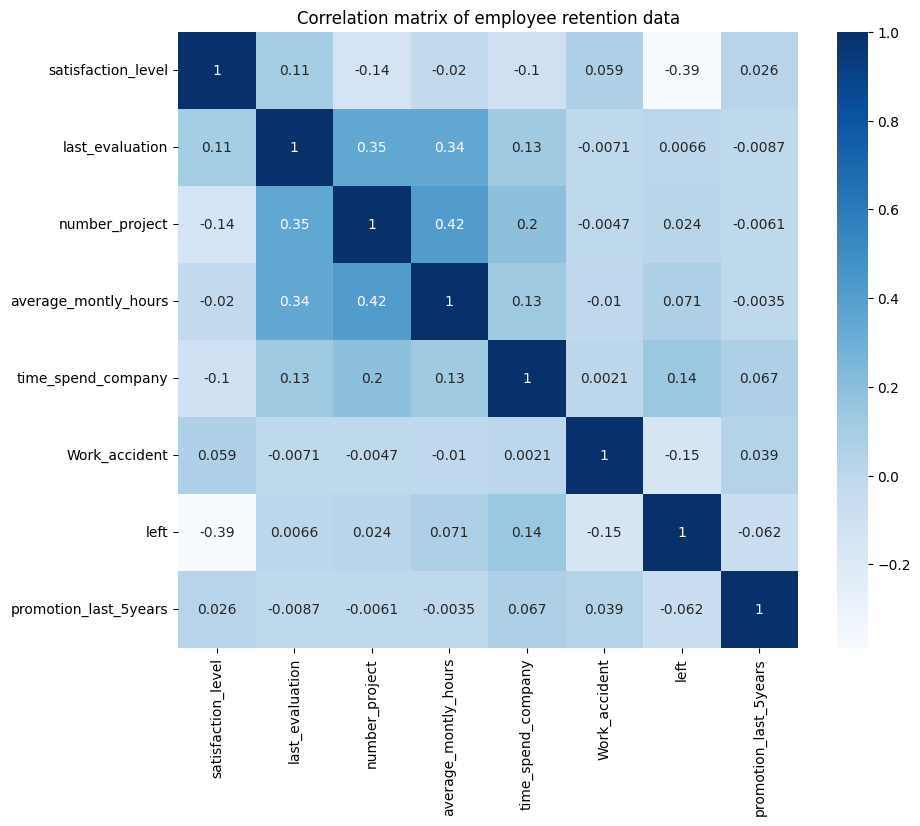

In [7]:
import seaborn as  sns 
# Exclude categorical variables
df_numeric = df.select_dtypes(exclude='object')
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')
plt.title('Correlation matrix of employee retention data')
plt.show()

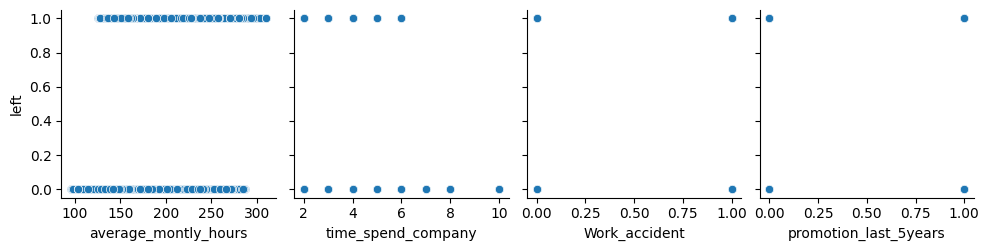

In [8]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.pairplot(data = df,x_vars = ['average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years'],
             y_vars = 'left',kind= 'scatter')
plt.show()

In [9]:
df_numeric = df.iloc[:,:-2]
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [10]:
df_numeric.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Observation : Mean of staisfaction level, average monthly hours, promotion in last 5 years in case of leaving company or not, is more compratively.
As we can see our outcome variable is continous, so we have to use logistic regression.

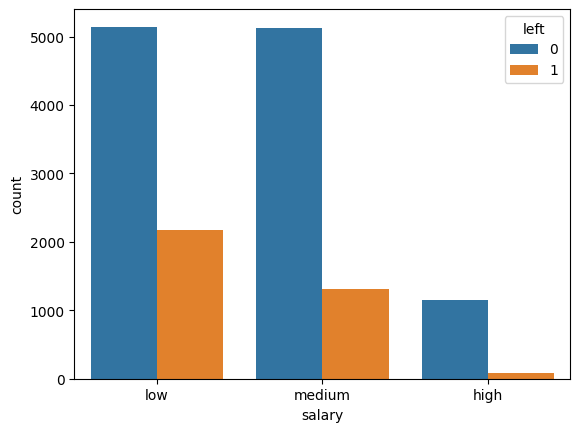

In [11]:
sns.countplot(data = df, x = 'salary',hue='left')
plt.show()

We can observe that ratio of person leaving the company and remaining in the company is very differnt in each pay category. So, we can include salary factor.

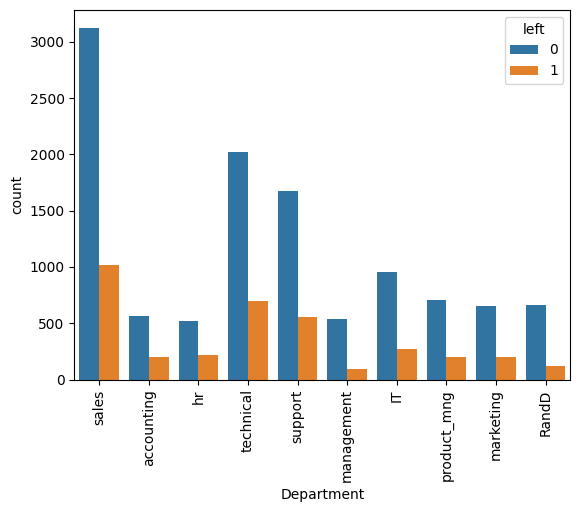

In [12]:
sns.countplot(data = df, x = 'Department',hue='left')
plt.xticks(rotation =90)
plt.show()

We can observe that ratio of person leaving the company and remaining in the company somewhat same in every department. So, we can safely ignore this factor.

In [13]:
#Preparing data for Training the model : converting salary into dummies
salary_dummies = pd.get_dummies(df['salary'],dtype = int)
salary_dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [14]:
df_with_dummies = pd.concat([df,salary_dummies],axis = 'columns')

In [15]:
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


We are removing medium, to get out of dummy trap,however sklearn already take care of it.

In [16]:
df_with_dummies.drop(columns =['salary','medium'],inplace = True)

In [17]:
df_with_dummies

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,high,low
0,0.38,0.53,2,157,3,0,1,0,sales,0,1
1,0.80,0.86,5,262,6,0,1,0,sales,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,1
4,0.37,0.52,2,159,3,0,1,0,sales,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,0,1
14995,0.37,0.48,2,160,3,0,1,0,support,0,1
14996,0.37,0.53,2,143,3,0,1,0,support,0,1
14997,0.11,0.96,6,280,4,0,1,0,support,0,1


In [18]:
from sklearn.model_selection import train_test_split
x = df_with_dummies[['satisfaction_level','average_montly_hours','promotion_last_5years','high','low']].values
y = df_with_dummies['left']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
model = LogisticRegression()
model.fit(x,y)


LogisticRegression()

In [20]:
model.score (x_train, y_train)

0.7743145262105176

In [21]:
model.score (x_test, y_test)

0.7813333333333333

In [22]:
result = model.predict(x_test)

In [23]:
data = {'left':result}
left = pd.DataFrame(data)

In [24]:
predicted_df = pd.concat([pd.DataFrame(x_test),left],axis = 'columns')
predicted_df

,0,1,2,3,4,left
0,0.59,243.0,0.0,0.0,1.0,0
1,0.84,140.0,0.0,0.0,1.0,0
2,0.83,186.0,0.0,0.0,0.0,0
3,0.45,151.0,0.0,0.0,0.0,0
4,0.37,127.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
2995,0.56,148.0,0.0,0.0,1.0,0
2996,0.28,170.0,0.0,0.0,1.0,1
2997,0.41,137.0,0.0,0.0,0.0,0
2998,0.65,172.0,0.0,0.0,0.0,0


Accuracy of the model

In [25]:
model.score(x_test,y_test)
0.7703333333333333

0.7703333333333333

In [27]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predict on the test data
y_pred = model.predict(x_test)

print("Predictions:", y_pred)

# Evaluate the model performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Predictions: [0 0 0 ... 0 0 0]
Confusion Matrix:
 [[2155  149]
 [ 507  189]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      2304
           1       0.56      0.27      0.37       696

    accuracy                           0.78      3000
   macro avg       0.68      0.60      0.62      3000
weighted avg       0.75      0.78      0.75      3000



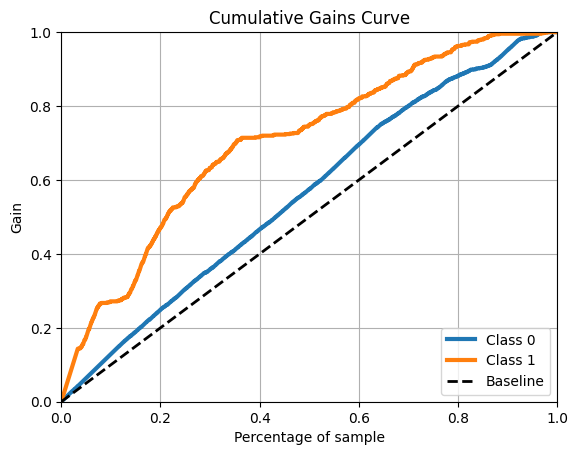

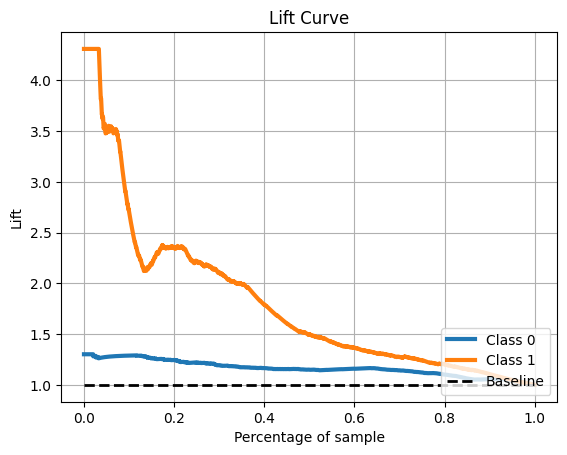

In [28]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate probabilities of the positive class
y_probas = model.predict_proba(x_test)

# Gain and Lift Chart
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

skplt.metrics.plot_lift_curve(y_test, y_probas)
plt.show()
